### Bài 1

#### 1. Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với 4 đặc trưng đầu

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read data file iris.data
df = pd.read_csv('iris.data',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
#rename columns
df.set_axis(['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)', 'class'], axis=1, inplace=True)

statistics

In [4]:
#get size of the dataframes
print("Size of the data: ", len(df))

Size of the data:  150


In [5]:
#get shape of dataframes
df.shape

(150, 5)

In [6]:
#describle numeric data
df.describe()


,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#count of each class 
print(df['class'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


In [8]:
#correlation
df.corr()


,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
sepal_length (cm),1.000000,-0.109369,0.871754,0.817954
sepal_width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal_length (cm),0.871754,-0.420516,1.000000,0.962757
petal_width (cm),0.817954,-0.356544,0.962757,1.000000


Boxplot

Boxplot for first 4 columns


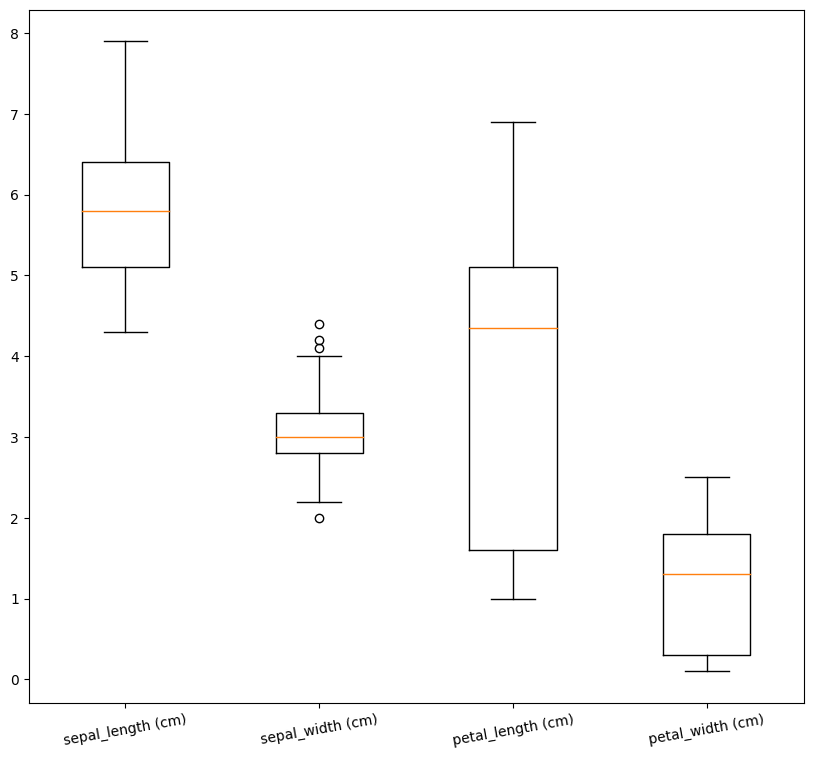

In [9]:
#draw boxplot using plt for first 4 columns
print("Boxplot for first 4 columns")
fig = plt.figure(figsize =(10, 9))
columns = [df['sepal_length (cm)'],df['sepal_width (cm)'],df['petal_length (cm)'],df['petal_width (cm)']]
plt.boxplot(columns)
plt.xticks([1, 2, 3, 4], ["sepal_length (cm)", "sepal_width (cm)", "petal_length (cm)", "petal_width (cm)"], rotation=10)
plt.show()

histogram

<Axes: title={'center': 'petal_width (cm)'}, ylabel='Frequency'>

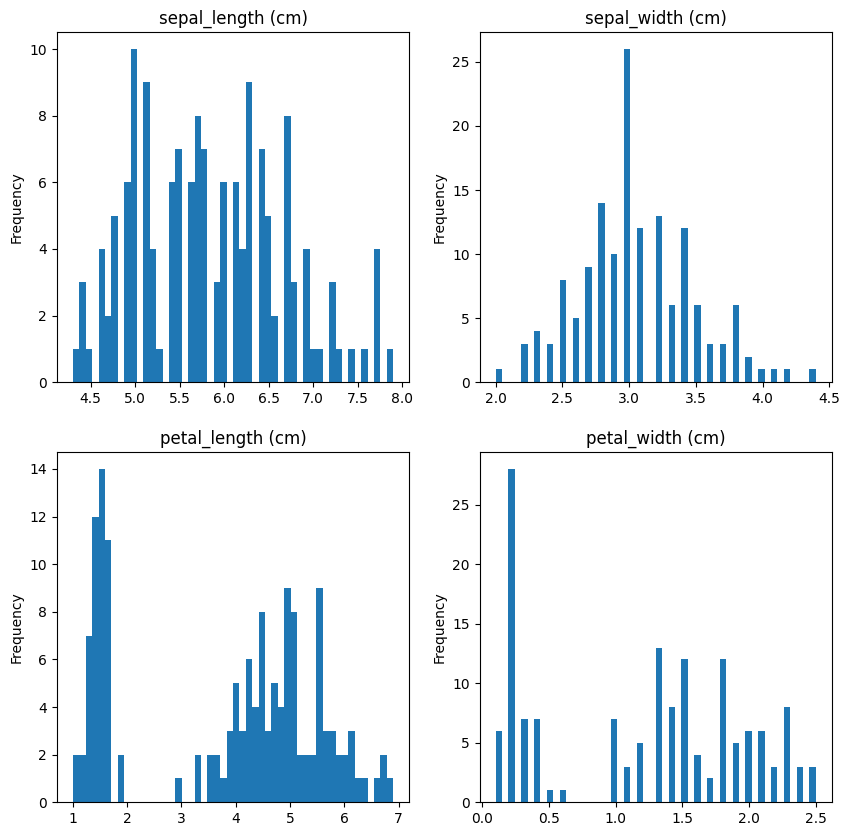

In [10]:
#draw subplots hist for each columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
df['sepal_length (cm)'].plot(ax=axes[0,0], kind='hist', title='sepal_length (cm)', bins=50)
df['sepal_width (cm)'].plot(ax=axes[0,1], kind='hist', title='sepal_width (cm)', bins=50)
df['petal_length (cm)'].plot(ax=axes[1,0], kind='hist', title='petal_length (cm)', bins=50)
df['petal_width (cm)'].plot(ax=axes[1,1], kind='hist', title='petal_width (cm)', bins=50)



In [11]:
key = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
Y = df['class'].map(key)
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

#### 2. Chuyển đổi các lớp thành số một cách tự động

In [12]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df['class'] = le.fit_transform(df['class'])
df.head()


,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 3. Sử dụng 4 đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành 2 phần Train/Test với tỉ lệ 7:3, cho biết trong bộ dữ liệu đã cho có dữ liệu nào null không, phân tích bộ dữ liệu theo từng lớp qua các biểu đồ.

In [13]:
#checking null values
df.isnull().sum()

sepal_length (cm)    0
sepal_width (cm)     0
petal_length (cm)    0
petal_width (cm)     0
class                0
dtype: int64

In [14]:
#split data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1)

analysis using boxplot, scatter plot, histogram

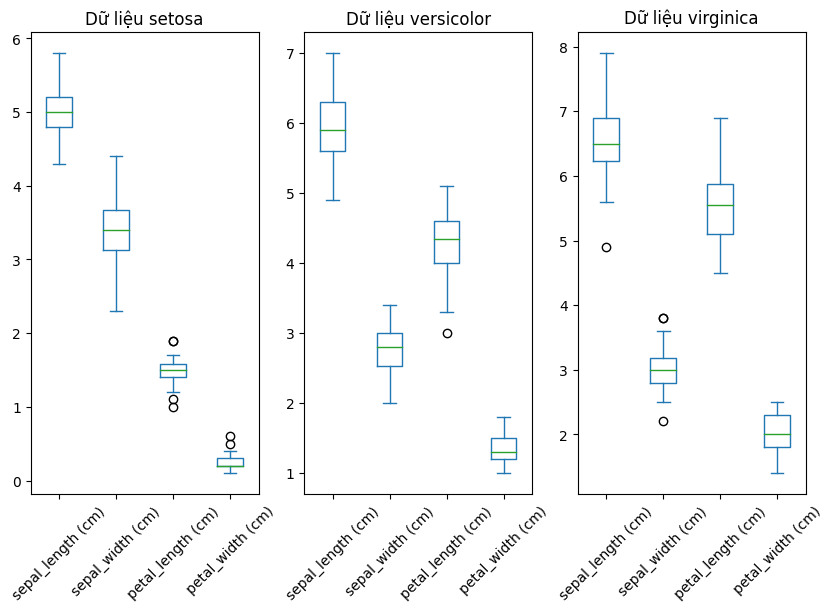

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 6))

setosa_data = df[df['class'] == 0]
versicolor_data = df[df['class'] == 1]
virginica_data = df[df['class'] == 2]

setosa_data.iloc[:,:4].plot(kind="box", ax=ax[0], title="Dữ liệu setosa", rot=45)
versicolor_data.iloc[:,:4].plot(kind="box", ax=ax[1], title="Dữ liệu versicolor", rot=45)
virginica_data.iloc[:,:4].plot(kind="box", ax=ax[2], title="Dữ liệu virginica", rot=45)

plt.show()


setosa_hist

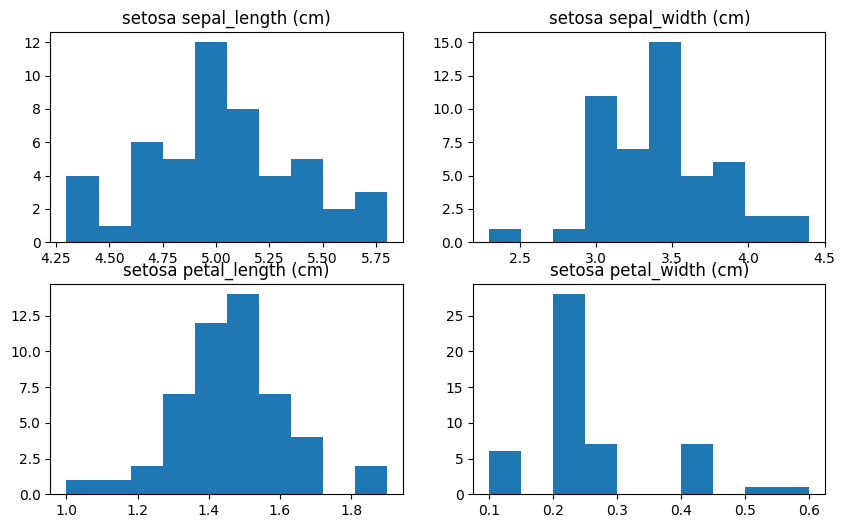

In [16]:
#hist for setosa
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax[0,0].hist(setosa_data['sepal_length (cm)'])
ax[0,0].set_title('setosa sepal_length (cm)')
ax[0,1].hist(setosa_data['sepal_width (cm)'])
ax[0,1].set_title('setosa sepal_width (cm)')
ax[1,0].hist(setosa_data['petal_length (cm)'])
ax[1,0].set_title('setosa petal_length (cm)')
ax[1,1].hist(setosa_data['petal_width (cm)'])
ax[1,1].set_title('setosa petal_width (cm)')
plt.show()


versicolor_hist

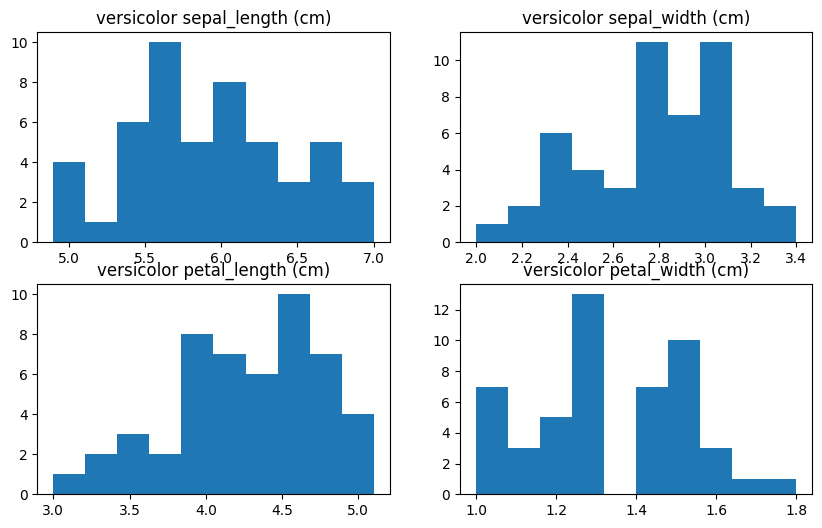

In [17]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax[0,0].hist(versicolor_data['sepal_length (cm)'])
ax[0,0].set_title('versicolor sepal_length (cm)')
ax[0,1].hist(versicolor_data['sepal_width (cm)'])
ax[0,1].set_title('versicolor sepal_width (cm)')
ax[1,0].hist(versicolor_data['petal_length (cm)'])
ax[1,0].set_title('versicolor petal_length (cm)')
ax[1,1].hist(versicolor_data['petal_width (cm)'])
ax[1,1].set_title('versicolor petal_width (cm)')
plt.show()

virginica_hist

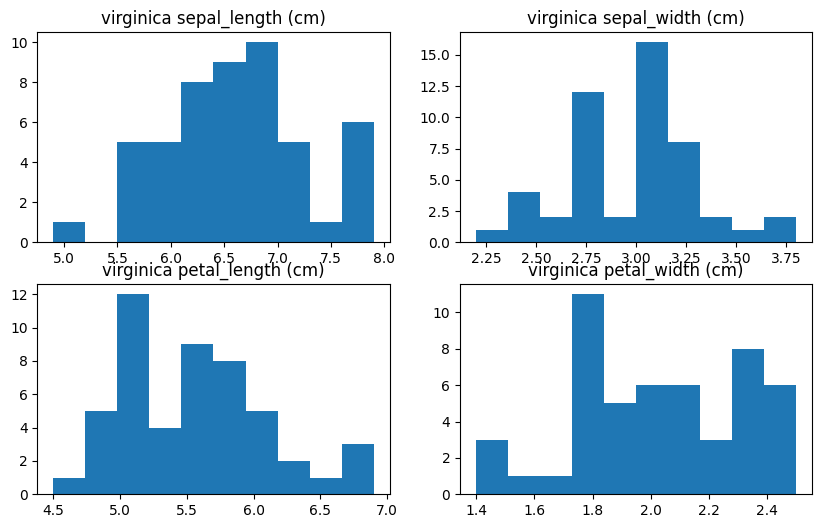

In [18]:
fig, ax = plt.subplots(2,2, figsize=(10, 6))
ax[0,0].hist(virginica_data['sepal_length (cm)'])
ax[0,0].set_title('virginica sepal_length (cm)')
ax[0,1].hist(virginica_data['sepal_width (cm)'])
ax[0,1].set_title('virginica sepal_width (cm)')
ax[1,0].hist(virginica_data['petal_length (cm)'])
ax[1,0].set_title('virginica petal_length (cm)')
ax[1,1].hist(virginica_data['petal_width (cm)'])
ax[1,1].set_title('virginica petal_width (cm)')
plt.show()

<Axes: >

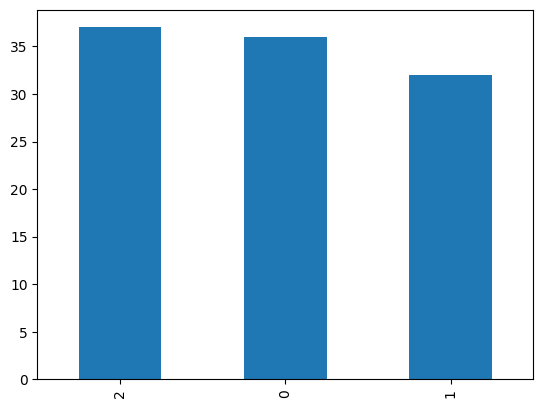

In [19]:
train['class'].value_counts().plot(kind='bar')

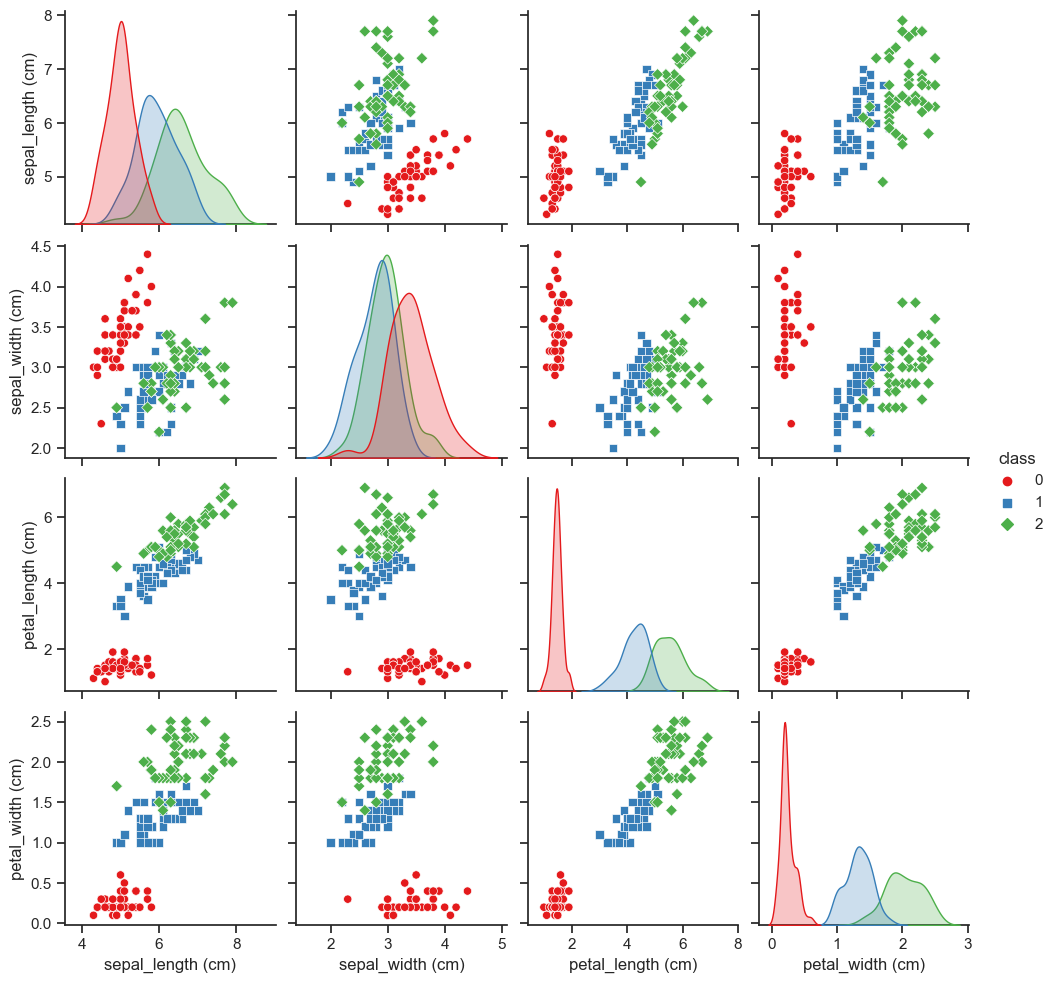

In [20]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df, hue="class", markers=["o", "s", "D"], palette="Set1")
plt.show()

#### 4. Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 5-Fold (k-fold)

In [36]:

X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)
y_train = train['class']
Y_test = test['class']



In [37]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


#finding the best k value using grid search
knn = KNeighborsClassifier()
kfold = KFold(n_splits=5)
param_grid = {'n_neighbors': np.arange(1, 10)}
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


{'n_neighbors': 5}
0.9619047619047618


In [38]:
#evaluation on test set
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_test,Y_test, cv=kfold, scoring='accuracy')
print(scores.mean())

0.9555555555555555


#### 5. Huấn luyện dữ liệu cho bài toán phân lớp sử dụng 4 đặc trưng trên với các giải thuật Bayes, SVM, Linear Regression và Decision Tree.

#### 6. Tính độ đo F1 score
#### 7. Tính độ đo Accuracy
#### 8. Tính độ đo Confusion Matrix

In [39]:
#Native Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_predict = nb_model.predict(X_test)
accuracy_nb = accuracy_score(Y_test, nb_predict)
confusion_matrix_nb = confusion_matrix(Y_test, nb_predict)
#vì phân bố của các lớp là không đồng đều nên ta sử dụng f1_score weighted
f1_score_nb = f1_score(Y_test, nb_predict, average='weighted')
print("Accuracy: ",accuracy_nb)
print("Confusion Matrix: ",confusion_matrix_nb)

print("F1 Score:", f1_score_nb)




Accuracy:  0.9333333333333333
Confusion Matrix:  [[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
F1 Score: 0.933615520282187


In [40]:
#SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(Y_test, y_pred_svm)
f1_score_svm = f1_score(Y_test, y_pred_svm, average='weighted')
print("Accuracy:",accuracy_svm)
print("Confusion Matrix: ",confusion_matrix_svm)
print("F1 Score: ",f1_score_svm)


Accuracy: 0.9777777777777777
Confusion Matrix:  [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
F1 Score:  0.9778718400940623


In [41]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

loreg = LogisticRegression(max_iter=1000)
loreg.fit(X_train, y_train)
y_pred_loreg = loreg.predict(X_test)
accuracy_loreg = accuracy_score(Y_test, y_pred_loreg)
confusion_matrix_loreg = confusion_matrix(Y_test, y_pred_loreg)
f1_score_loreg = f1_score(Y_test, y_pred_loreg, average='weighted')
print('Accuracy: ',accuracy_loreg)
print("Confusion Matrix: ",confusion_matrix_loreg)
print("F1 Score: ",f1_score_loreg)

Accuracy:  0.9777777777777777
Confusion Matrix:  [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
F1 Score:  0.9778718400940623


In [42]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(Y_test, y_pred_dt)
f1_score_dt = f1_score(Y_test, y_pred_dt, average='weighted')
print("Accuracy:",accuracy_dt)
print("Confusion Matrix: ",confusion_matrix_dt)
print("F1 Score: ",f1_score_dt)

Accuracy: 0.9555555555555556
Confusion Matrix:  [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
F1 Score:  0.9555555555555556


#### 9. So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên

Text(0.5, 1.0, 'F1 Score')

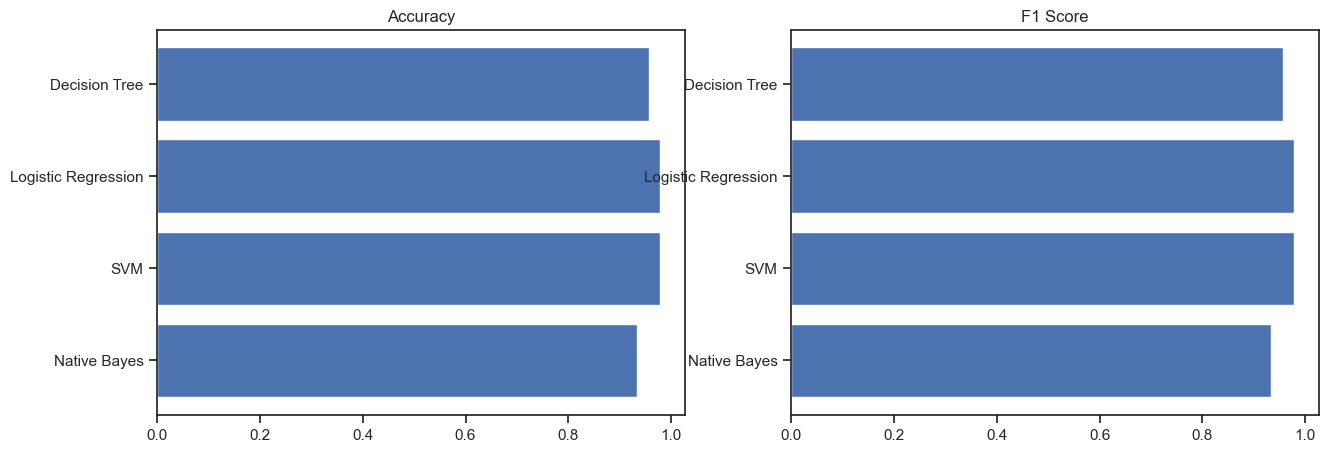

In [43]:
models = [
    ("Native Bayes", accuracy_nb,f1_score_nb,confusion_matrix_nb),
    ("SVM", accuracy_svm,f1_score_svm,confusion_matrix_svm),
    ("Logistic Regression", accuracy_loreg,f1_score_loreg,confusion_matrix_loreg),
    ("Decision Tree", accuracy_dt,f1_score_dt,confusion_matrix_dt),
]
model_names = [m[0] for m in models]
accuracy = [m[1] for m in models]
f1_scores = [m[2] for m in models]
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].barh(model_names, accuracy)
ax[0].set_title("Accuracy")
ax[1].barh(model_names, f1_scores)
ax[1].set_title("F1 Score")

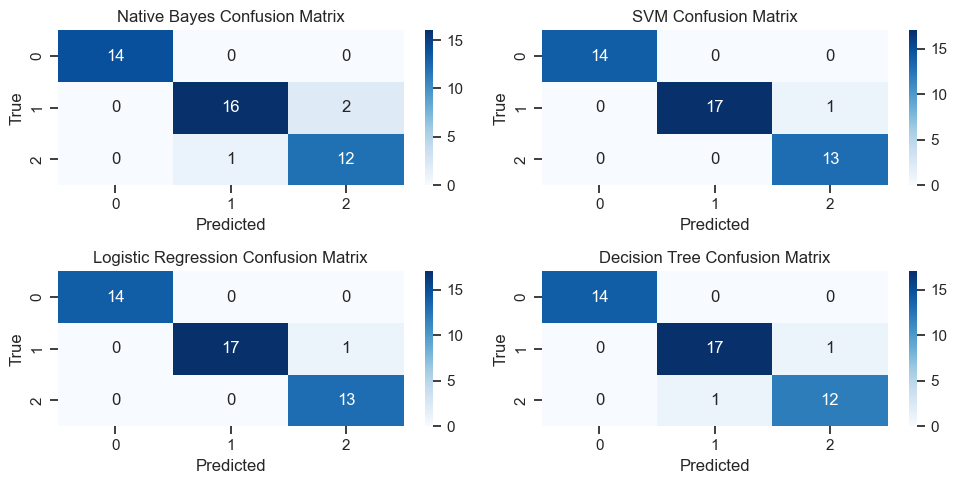

In [44]:
import seaborn as sns

confusion_matrices =[m[3] for m in models]

# List tên các mô hình

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(10, 5))

for i, confusion_matrix in enumerate(confusion_matrices):
    plt.subplot(2, 2, i+1)
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title(model_names[i] + " Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")

plt.tight_layout()
plt.show()

#### 10. Lưu model với giải thuật đạt kết quả tốt nhất

In [45]:
#model LogisticRegression hoặc SVM
#save models
import pickle
with open('Iris-Classification-LR.pkl', 'wb') as file:
    pickle.dump(loreg, file)
